<h4>Linear Regression Project</h4>
<p>Congratulations it's your first contract as a data scientist with a New York City-based ecommerce company that sells clothing online. In addition to their online sales, they offer in-store style and clothing advice sessions. Customers can visit the store, consult with a personal stylist, and then place their orders either through a mobile app or the website. The company is currently evaluating whether to prioritize their mobile app or website experience, and they've brought you on board to assist in making this decision. Let's dive in!</h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r'D:\Downloads\Datasets\Ecommerce Customers')
df = data.copy()
data.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.shape

(500, 8)

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


<p>As per the info method, there is no null values</p>

In [8]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [10]:
df.columns = df.columns.str.replace(' ','_')

<p>Select only the relevant columns that are useful for your task. Here it is the numerical columns</p>

In [13]:
df = df.select_dtypes(exclude='object')

In [14]:
df

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


<Axes: >

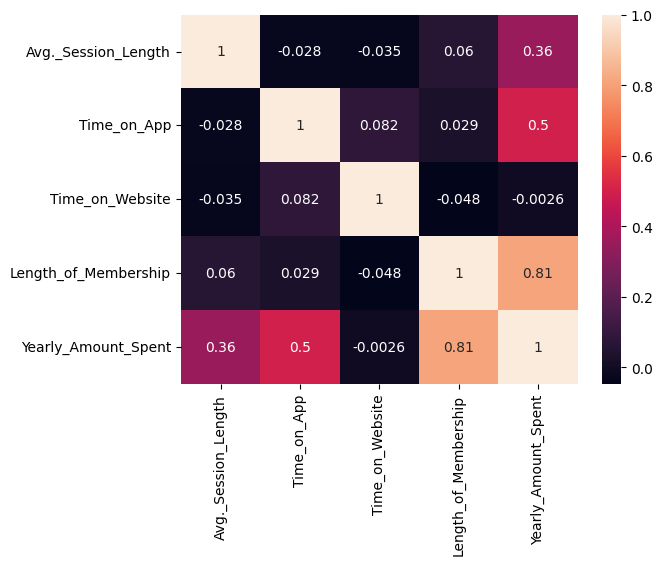

In [53]:
sns.heatmap(data=df.corr(), annot=True)

<p>Length of membership and yearly amount spent is highly correlated

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


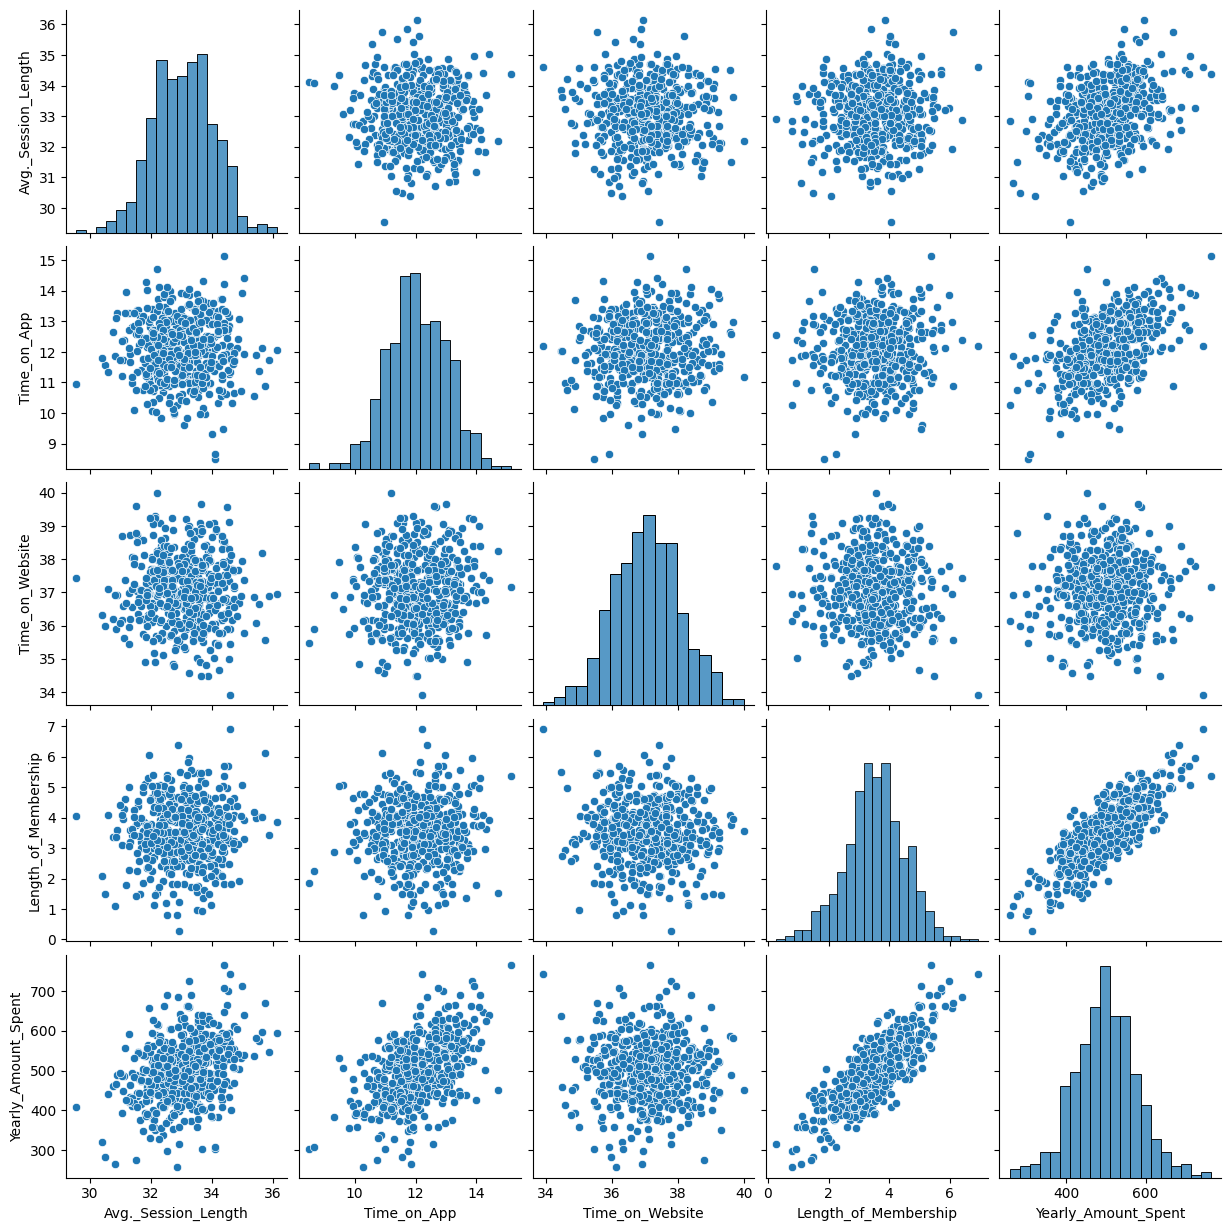

In [18]:
sns.pairplot(df)

<p>From the pairplot we can conclude there are some linear relationships between yearly amount spent with other input features. So we can test the dataset with linear regression</p>

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1].values.reshape(-1,1)
X.shape, y.shape

((500, 4), (500, 1))

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [34]:
predictions = model_lr.predict(X_test)

In [35]:
model_lr.coef_

array([[25.5962591 , 38.78534598,  0.31038593, 61.89682859]])

In [36]:
print('MAE',mean_absolute_error(y_test,predictions))
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(mean_squared_error(y_test,predictions)))
print('r2_score', r2_score(y_test, predictions))

MAE 8.558441885315217
MSE 109.86374118393982
RMSE 10.481590584636466
r2_score 0.9778130629184127


In [37]:
explained_variance_score(y_test,predictions)

0.9779115555030538

<p>Examine Linear regression Assumptions to see if the residuals are normally distributed<p>

C:\Users\HP\AppData\Local\Temp\ipykernel_6812\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: ylabel='Density'>

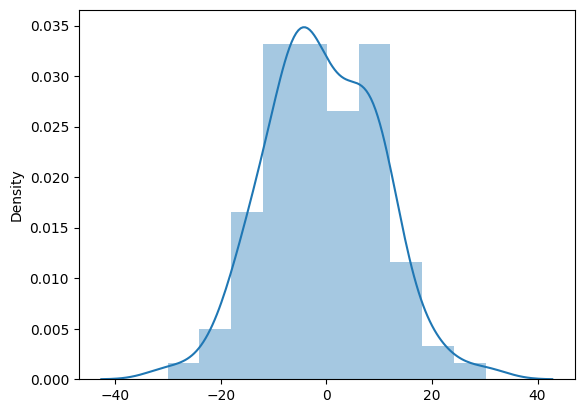

In [40]:
sns.distplot(y_test-predictions)

<h4>Conclusion</h4>
<p>We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [46]:
pd.DataFrame(model_lr.coef_,columns=X.columns)

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership
0,25.596259,38.785346,0.310386,61.896829


<h3><b>How can you interpret these coefficients?</b></h3>

The greater the value the more related it is to the target, in this case yearly amount spent

<h3><b>Do you think the company should focus more on their mobile app or on their website?</b></h3>

The company should focus on the mobile app